In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('C:\\Users\\venka\\Desktop\\Kaggle\\Titanic\\train.csv')
test = pd.read_csv('C:\\Users\\venka\\Desktop\\Kaggle\\Titanic\\test.csv')

In [3]:
print(train.head())
print('---------------------------------------------------------------')
print(pd.get_dummies(train['Embarked'],prefix='Embarked_').head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
--

In [4]:
## Finding details of features (Cocentrate on Categorical)
print(train.shape)
for colname in train.columns:
    if train[colname].dtype == 'object':
        nUnique = len(train[colname].unique())
        #print(train[colname].value_counts())
        print('Feature',colname,'has',nUnique, 'unique values')

#print(len(train['Embarked'].unique()))
#print(train['Embarked'].value_counts())

(891, 12)
Feature Name has 891 unique values
Feature Sex has 2 unique values
Feature Ticket has 681 unique values
Feature Cabin has 148 unique values
Feature Embarked has 4 unique values


In [5]:
print(train['Embarked'].value_counts().sort_values(ascending=False))
print('---------------------------------------------------------------')
print(train[['Embarked']].isnull().sum())
train['Embarked'].fillna('S',inplace=True)
print(train[['Embarked']].isnull().sum())
train['Embarked'] = train['Embarked'].map({'S':0,'C':1,'Q':2}).astype(int)
test['Embarked'] = test['Embarked'].map({'S':0,'C':1,'Q':2}).astype(int)
print(train['Embarked'].head())
print(train['Embarked'].value_counts().sort_values(ascending=False))

S    644
C    168
Q     77
Name: Embarked, dtype: int64
---------------------------------------------------------------
Embarked    2
dtype: int64
Embarked    0
dtype: int64
0    0
1    1
2    0
3    0
4    0
Name: Embarked, dtype: int32
0    646
1    168
2     77
Name: Embarked, dtype: int64


In [6]:
print(train.shape,test.shape)
print(train.isnull().sum())
print(test.isnull().sum())

(891, 12) (418, 11)
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [7]:
test['Fare'].fillna(inplace=True,value=test['Fare'].mean())
train['Age'].fillna(inplace=True,value=train['Age'].median())
test['Age'].fillna(inplace=True,value=test['Age'].median())

In [8]:
#print(train.head())
train['Sex'] = train['Sex'].map({'female':0,'male':1}).astype(int)
test['Sex'] = test['Sex'].map({'female':0,'male':1}).astype(int)

In [9]:
print(train.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare Cabin  Embarked  
0         A/5 21171   7.2500   NaN         0  
1          PC 17599  71.2833   C85         1  
2  STON/O2. 3101282   7.9250   NaN         0  
3            113803  53.1000  C123         0  
4            373450   8.0500   NaN         0  


In [10]:
train.drop('Cabin',1,inplace=True)
test.drop('Cabin',1,inplace=True)

In [11]:
train.head()
#train[['Ticket','Survived']].groupby('Ticket').mean()
for i in range(train.shape[0]):
    stir = train['Name'][i]
    train['Name'][i] = stir.split(' ')[1]
print(train['Name'].value_counts())

c:\users\venka\python36\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Mr.             502
Miss.           179
Mrs.            121
Master.          40
Dr.               7
Rev.              6
y                 4
Planke,           3
Impe,             3
Col.              2
Mlle.             2
Major.            2
Gordon,           2
Jonkheer.         1
Velde,            1
the               1
Mulder,           1
Mme.              1
Billiard,         1
Capt.             1
Walle,            1
der               1
Melkebeke,        1
Carlo,            1
Ms.               1
Steen,            1
Cruyssen,         1
Messemaeker,      1
Shawah,           1
Pelsmaeker,       1
Don.              1
Name: Name, dtype: int64


In [12]:
for i in range(test.shape[0]):
    stir = test['Name'][i]
    test['Name'][i] = stir.split(' ')[1]
print(test['Name'].value_counts())

c:\users\venka\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Mr.             234
Miss.            77
Mrs.             70
Master.          19
y                 4
Col.              2
Rev.              2
Billiard,         2
Dr.               1
Palmquist,        1
Carlo,            1
Messemaeker,      1
Planke,           1
Brito,            1
Ms.               1
Khalil,           1
Name: Name, dtype: int64


In [ ]:
891-502-179-121-40-7-6

In [13]:
for i in [train,test]:
    i['Name'] = [x if x in ['Mr.','Miss.','Mrs.','Master.','Dr.','Rev.'] else 'other' for x in i['Name']]
print(test['Name'].value_counts())
print(train['Name'].value_counts())
train1 = train.copy()
test1 = test.copy()

Mr.        234
Miss.       77
Mrs.        70
Master.     19
other       15
Rev.         2
Dr.          1
Name: Name, dtype: int64
Mr.        502
Miss.      179
Mrs.       121
Master.     40
other       36
Dr.          7
Rev.         6
Name: Name, dtype: int64


In [17]:
lis = ['Name']
def getDummies(df,colList):
    for i in colList:
        df_dummies = pd.get_dummies(df[i], prefix='Name',dummy_na=False)
        #print(df_dummies.head())
        #i.drop('Name',1,inplace=True)
        df = pd.concat([df,df_dummies],axis=1)
    return df
test1 = getDummies(test1,lis)
train1 = getDummies(train1,lis)
print(test1.columns,train1.columns)

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Name_Dr.', 'Name_Master.', 'Name_Miss.',
       'Name_Mr.', 'Name_Mrs.', 'Name_Rev.', 'Name_other'],
      dtype='object') Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Name_Dr.', 'Name_Master.',
       'Name_Miss.', 'Name_Mr.', 'Name_Mrs.', 'Name_Rev.', 'Name_other'],
      dtype='object')


In [18]:
test1.drop(lis,1,inplace=True)
train1.drop(lis,1,inplace=True)

In [52]:
#train1['Ticket'].sort_values(ascending=False)[:200]
lis = []
for i in train['Ticket']:
    curr = 0
    try:
        curr = int(i)
        lis.append('Int')
    except(ValueError):
        lis.append('Not int')
    #lis.append(type(curr))
    #print(type(curr))
df = pd.Series(lis)
print(df.value_counts())

Int        661
Not int    230
dtype: int64


In [67]:
train1['tick'] = df
train1['tick']

0      Not int
1      Not int
2      Not int
3          Int
4          Int
5          Int
6          Int
7          Int
8          Int
9          Int
10     Not int
11         Int
12     Not int
13         Int
14         Int
15         Int
16         Int
17         Int
18         Int
19         Int
20         Int
21         Int
22         Int
23         Int
24         Int
25         Int
26         Int
27         Int
28         Int
29         Int
        ...   
861        Int
862        Int
863    Not int
864        Int
865        Int
866    Not int
867    Not int
868        Int
869        Int
870        Int
871        Int
872        Int
873        Int
874    Not int
875        Int
876        Int
877        Int
878        Int
879        Int
880        Int
881        Int
882        Int
883    Not int
884    Not int
885        Int
886        Int
887        Int
888    Not int
889        Int
890        Int
Name: tick, Length: 891, dtype: object

In [70]:
test1.drop('Ticket',1,inplace=True)
train1.drop(['Ticket','tick'],1,inplace=True)

In [95]:
test1.drop('PassengerId',1,inplace=True)
train1.drop(['PassengerId'],1,inplace=True)

In [73]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

In [74]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
	AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()]

In [96]:
trainX = train1.drop('Survived',1)
trainY = train1['Survived']
testData = test1

In [78]:
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

In [79]:
acc_dict = {}
log_cols = ["Classifier", "Accuracy"]

In [ ]:
for trIndex,tsIndex in sss.split(trainX,trainY):
    Xtrain, Xtest = trainX.iloc[trIndex,],trainX.iloc[tsIndex,]
    Ytrain, Ytest = trainY[trIndex],trainY[tsIndex]
    
    for i,clf in enumerate(classifiers):
        name = clf.__class__.__name__
        clf.fit(Xtrain, Ytrain)
        testPred = clf.predict(Xtest)
        acc = accuracy_score(Ytest, testPred)
        if name in acc_dict:
            acc_dict[name] += acc
        else:
            acc_dict[name] = acc
#print(acc_dict)"
log  = pd.DataFrame(columns=log_cols)
for i,clf in enumerate(acc_dict):
    acc_dict[clf] = acc_dict[clf]/10.0
    #print(i,clf,acc_dict[clf])
    singleEntry = pd.DataFrame([[clf,acc_dict[clf]]],columns=log_cols)
    log = log.append(singleEntry)
    
print(log)

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Name_Dr.', 'Name_Master.', 'Name_Miss.', 'Name_Mr.', 'Name_Mrs.',
       'Name_Rev.', 'Name_other'],
      dtype='object')


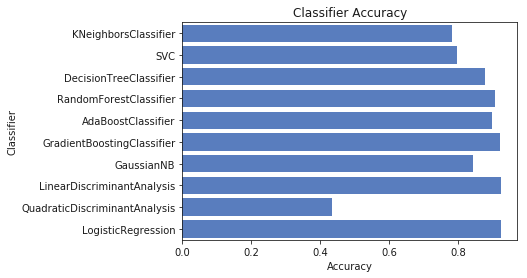

In [103]:
import seaborn as sns
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')
print(trainX.columns)
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")
plt.show()

In [ ]:
selectedParams = ['Sex']
#finalCLF = LogisticRegression()
finalCLF = SVC(tol=1e-75,verbose=True,probability=True)
finalCLF.fit(trainX,trainY)
preds = finalCLF.predict(testData)
submission = pd.read_csv('C:\\Users\\venka\\Desktop\\Kaggle\\Titanic\\submission.csv')
submission['Survived'] = preds
print(submission.describe())
submission.to_csv('C:\\Users\\venka\\Desktop\\Kaggle\\Titanic\\CleanedData_SVC.csv',index=False)

[LibSVM]

In [ ]:
55/8